In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('sources/smsspamcollection.tsv', sep='\t')

In [3]:
df.head()

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2


In [4]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   label    5572 non-null   object
 1   message  5572 non-null   object
 2   length   5572 non-null   int64 
 3   punct    5572 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 174.2+ KB


In [6]:
df['label'].unique()

array(['ham', 'spam'], dtype=object)

In [7]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

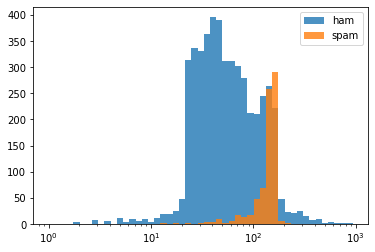

In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

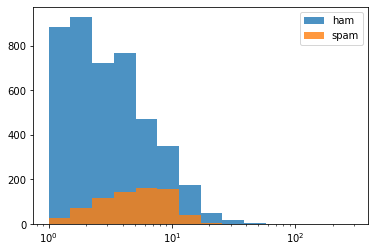

In [9]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [10]:
from sklearn.model_selection import train_test_split
X = df[['length', 'punct']]
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((3900, 2), (3900,), (1672, 2), (1672,))

In [11]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(solver='lbfgs')
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)

In [12]:
from sklearn import metrics
print("Accuracy of model: ")
print(metrics.accuracy_score(y_test, y_pred))
print("\nConfusion matrix: ")
print(metrics.confusion_matrix(y_test, y_pred))

Accuracy of model: 
0.8427033492822966

Confusion matrix: 
[[1404   44]
 [ 219    5]]


In [13]:
df1 = pd.DataFrame(metrics.confusion_matrix(y_test,y_pred), index=['ham','spam'], columns=['ham','spam'])
df1

,ham,spam
ham,1404,44
spam,219,5


In [14]:
print(metrics.classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         ham       0.87      0.97      0.91      1448
        spam       0.10      0.02      0.04       224

    accuracy                           0.84      1672
   macro avg       0.48      0.50      0.48      1672
weighted avg       0.76      0.84      0.80      1672



In [15]:
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))

[[1438  224]
 [  10    0]]


In [16]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         ham       0.99      0.87      0.92      1662
        spam       0.00      0.00      0.00        10

    accuracy                           0.86      1672
   macro avg       0.50      0.43      0.46      1672
weighted avg       0.99      0.86      0.92      1672



In [17]:
from sklearn.svm import SVC
svc_model = SVC()
svc_model.fit(X_train, y_train)
y_pred = svc_model.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))

[[1420  186]
 [  28   38]]


In [18]:
print(metrics.classification_report(y_pred, y_test))

              precision    recall  f1-score   support

         ham       0.98      0.88      0.93      1606
        spam       0.17      0.58      0.26        66

    accuracy                           0.87      1672
   macro avg       0.58      0.73      0.60      1672
weighted avg       0.95      0.87      0.90      1672



### text feature extraction

In [19]:
X = df['message']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [20]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()

In [21]:
# fitting and transforming the text 
# fitting means building a vocabulary dictionary and counting the number of words
# transforming means turning the text into a vector
# count_vect.fit(X_train)
# X_train_counts = count_vect.transform(X_train)
# or below method do the both
X_train_counts = count_vect.fit_transform(X_train)
X_train_counts

<3900x7263 sparse matrix of type '<class 'numpy.int64'>'
	with 52150 stored elements in Compressed Sparse Row format>

In [22]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()

In [23]:
# converting count vectors to tfidf vector
# tfidf vector is the weighted vecor of each word according to its term frequency and inverse document frequency
# means assigning weights according to local (in a document) and general (all documents) frequency 
# source: https://www.quora.com/What-is-a-tf-idf-vector
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(3900, 7263)

In [24]:
# below method does all the work above - counting, transforming, tfidf vectorization
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()
X_train_vect_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_train_vect_tfidf.shape

(3900, 7263)

In [25]:
from sklearn.svm import LinearSVC
clf = LinearSVC()
clf.fit(X_train_vect_tfidf, y_train)

LinearSVC()

In [26]:
# building a pipeline to prevent repeating processes
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', LinearSVC())])
text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
print('-------------')
print(metrics.classification_report(y_pred, y_test))

[[1445   10]
 [   3  214]]
-------------
              precision    recall  f1-score   support

         ham       1.00      0.99      1.00      1455
        spam       0.96      0.99      0.97       217

    accuracy                           0.99      1672
   macro avg       0.98      0.99      0.98      1672
weighted avg       0.99      0.99      0.99      1672



In [27]:
# prediction of a normal text message
text_clf.predict(['Hi How r u?'])

array(['ham'], dtype=object)

In [28]:
# prediction of a spam message
text_clf.predict(['Hey u won a lottery! Call 44565 asap'])

array(['spam'], dtype=object)

### project

In [29]:
df = pd.read_csv('sources/moviereviews.tsv', sep ='\t')
df.head()

,label,review
0,neg,how do films like mouse hunt get into theatres...
1,neg,some talented actresses are blessed with a dem...
2,pos,this has been an extraordinary year for austra...
3,pos,according to hollywood movies made in last few...
4,neg,my first press screening of 1998 and already i...


In [30]:
df.shape

(2000, 2)

In [31]:
df.isnull().sum()

label      0
review    35
dtype: int64

In [32]:
df.dropna(inplace=True)
df.isnull().sum()

label     0
review    0
dtype: int64

In [33]:
blanks_index = []
for index, label, row in df.itertuples():
    if row.isspace():
        blanks_index.append(index)
df.drop(blanks_index, inplace=True)
df.shape

(1938, 2)

In [34]:
X = df['review']
y = df['label']

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC

In [37]:
from sklearn.pipeline import Pipeline
text_clf = Pipeline([('tfidf', TfidfVectorizer()), ('clf', SVC())])
text_clf.fit(X_train, y_train)
y_pred = text_clf.predict(X_test)
print(metrics.confusion_matrix(y_pred, y_test))
print('-------------')
print(metrics.classification_report(y_pred, y_test))

[[233  49]
 [ 49 251]]
-------------
              precision    recall  f1-score   support

         neg       0.83      0.83      0.83       282
         pos       0.84      0.84      0.84       300

    accuracy                           0.83       582
   macro avg       0.83      0.83      0.83       582
weighted avg       0.83      0.83      0.83       582



Scikit-learn's built-in list contains 318 stopwords:
> <pre>from sklearn.feature_extraction import text
> print(text.ENGLISH_STOP_WORDS)</pre>
['a', 'about', 'above', 'across', 'after', 'afterwards', 'again', 'against', 'all', 'almost', 'alone', 'along', 'already', 'also', 'although', 'always', 'am', 'among', 'amongst', 'amoungst', 'amount', 'an', 'and', 'another', 'any', 'anyhow', 'anyone', 'anything', 'anyway', 'anywhere', 'are', 'around', 'as', 'at', 'back', 'be', 'became', 'because', 'become', 'becomes', 'becoming', 'been', 'before', 'beforehand', 'behind', 'being', 'below', 'beside', 'besides', 'between', 'beyond', 'bill', 'both', 'bottom', 'but', 'by', 'call', 'can', 'cannot', 'cant', 'co', 'con', 'could', 'couldnt', 'cry', 'de', 'describe', 'detail', 'do', 'done', 'down', 'due', 'during', 'each', 'eg', 'eight', 'either', 'eleven', 'else', 'elsewhere', 'empty', 'enough', 'etc', 'even', 'ever', 'every', 'everyone', 'everything', 'everywhere', 'except', 'few', 'fifteen', 'fifty', 'fill', 'find', 'fire', 'first', 'five', 'for', 'former', 'formerly', 'forty', 'found', 'four', 'from', 'front', 'full', 'further', 'get', 'give', 'go', 'had', 'has', 'hasnt', 'have', 'he', 'hence', 'her', 'here', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself', 'him', 'himself', 'his', 'how', 'however', 'hundred', 'i', 'ie', 'if', 'in', 'inc', 'indeed', 'interest', 'into', 'is', 'it', 'its', 'itself', 'keep', 'last', 'latter', 'latterly', 'least', 'less', 'ltd', 'made', 'many', 'may', 'me', 'meanwhile', 'might', 'mill', 'mine', 'more', 'moreover', 'most', 'mostly', 'move', 'much', 'must', 'my', 'myself', 'name', 'namely', 'neither', 'never', 'nevertheless', 'next', 'nine', 'no', 'nobody', 'none', 'noone', 'nor', 'not', 'nothing', 'now', 'nowhere', 'of', 'off', 'often', 'on', 'once', 'one', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 'part', 'per', 'perhaps', 'please', 'put', 'rather', 're', 'same', 'see', 'seem', 'seemed', 'seeming', 'seems', 'serious', 'several', 'she', 'should', 'show', 'side', 'since', 'sincere', 'six', 'sixty', 'so', 'some', 'somehow', 'someone', 'something', 'sometime', 'sometimes', 'somewhere', 'still', 'such', 'system', 'take', 'ten', 'than', 'that', 'the', 'their', 'them', 'themselves', 'then', 'thence', 'there', 'thereafter', 'thereby', 'therefore', 'therein', 'thereupon', 'these', 'they', 'thick', 'thin', 'third', 'this', 'those', 'though', 'three', 'through', 'throughout', 'thru', 'thus', 'to', 'together', 'too', 'top', 'toward', 'towards', 'twelve', 'twenty', 'two', 'un', 'under', 'until', 'up', 'upon', 'us', 'very', 'via', 'was', 'we', 'well', 'were', 'what', 'whatever', 'when', 'whence', 'whenever', 'where', 'whereafter', 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which', 'while', 'whither', 'who', 'whoever', 'whole', 'whom', 'whose', 'why', 'will', 'with', 'within', 'without', 'would', 'yet', 'you', 'your', 'yours', 'yourself', 'yourselves']

However, there are words in this list that may influence a classification of movie reviews. With this in mind, let's trim the list to just 60 words:

In [38]:
stopwords = ['a', 'about', 'an', 'and', 'are', 'as', 'at', 'be', 'been', 'but', 'by', 'can', \
             'even', 'ever', 'for', 'from', 'get', 'had', 'has', 'have', 'he', 'her', 'hers', 'his', \
             'how', 'i', 'if', 'in', 'into', 'is', 'it', 'its', 'just', 'me', 'my', 'of', 'on', 'or', \
             'see', 'seen', 'she', 'so', 'than', 'that', 'the', 'their', 'there', 'they', 'this', \
             'to', 'was', 'we', 'were', 'what', 'when', 'which', 'who', 'will', 'with', 'you']